In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [6]:
#split data into batches of 10000 points
batches10000 = [data[x:x+10000] for x in range(0, len(data), 10000)]

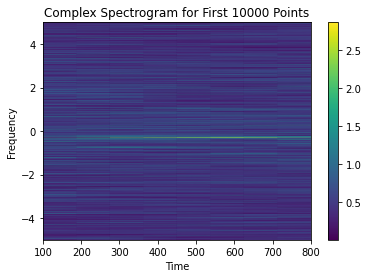

In [7]:
#complex spectrogram of first set of 10000 points
f, t, Sxx = signal.spectrogram(batches10000[0]-np.mean(batches10000[0]), 10, nperseg=2000, return_onesided=False, mode='complex')
plt.pcolormesh(t, fftshift(f), fftshift(abs(Sxx), axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Complex Spectrogram for First 10000 Points')
plt.show()

In [8]:
#Dividing each row of spectrogram Sxx by the average for each frequency 
normSxx=[]

for i in range(0,2000):
    normSxx.append(Sxx[i]/np.mean(abs(Sxx[i])))
    

#checking this    
#print(len(normSxx))
#print(normSxx[0])
#print(normSxx[1])
#print(Sxx[0]/np.mean(Sxx[0]))
#print(Sxx[1]/np.mean(Sxx[1]))

In [9]:
#try taking absolute value of norm Sxx to plot spectrogram 
absnormSxx=[]

for i in range(0,2000):
    absnormSxx.append(abs(normSxx[i]))

In [10]:
print(absnormSxx[0])

[1.15382229 1.19692057 0.54822073 0.99241254 1.10862387]


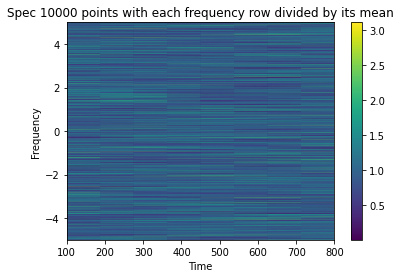

In [11]:
plt.pcolormesh(t, fftshift(f), fftshift(absnormSxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec 10000 points with each frequency row divided by its mean')
plt.show()

In [12]:
#want to take difference of complex values between time (x axis) and the next time
#product will be spectrogram of values for the time differences 

In [13]:
print(len(normSxx))
print(len(f))
print(len(t))
print(normSxx[0])

print(normSxx[2][:])
m = np.array(normSxx)
print(m.shape)


2000
2000
5
[-1.15026052+0.09059033j -1.13181057+0.38938885j -0.38786385-0.38743722j
 -0.66814081+0.7338055j   0.02091277+1.10842661j]
[ 1.0015593 +0.43709226j  0.47328697+1.15044769j -0.77371687+0.4964432j
  1.03236011+0.15048167j -0.67378373-0.1922027j ]
(2000, 5)


In [14]:
#test code for finding differences before implementing on normSxx
thing=[[1,2,4,7,11],[6,7,9,12,16],[11,12,14,17,21]]
new=[]
slice0=[]

for i in range(0,5):
    slice0.clear()
    for j in range(0,3):
        slice0.append(thing[j][i])
    new.append(slice0[:])

print(new)
print(len(new))

diff1=[]

for j in range(0,3):
    for i in range(0,4):
        diff1.append(new[i+1][j]-new[i][j])


diff=[diff1[x:x+4] for x in range(0, len(diff1), 4)]
print(diff1)
print(diff)

[[1, 6, 11], [2, 7, 12], [4, 9, 14], [7, 12, 17], [11, 16, 21]]
5
[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]


In [15]:
#differencing for normSxx
#normSxx is 2000 rows each with 5 values since len(t) is 5
#I first change this to get 5 time columns each containing 2000 values

#have introduced offset of 5 to ensure it can be seen on spectrogram

timecols=[]
tool=[]

for i in range(0,5):
    tool.clear()
    for j in range(0,len(normSxx)):
        if i==2:
            tool.append(normSxx[j][i]+5)
        else:
            tool.append(normSxx[j][i])
    timecols.append(tool[:])

    
#print(len(timecols))
#print(len(timecols[0]))

#do differencing to get list of differences and split this back into 2000 sections of 4 to plot

alldiffs=[]

for i in range(0,len(normSxx)):
    for j in range(0, 4):
        alldiffs.append(timecols[j+1][i]-timecols[j][i])
        
diffscols=[alldiffs[x:x+4] for x in range(0, len(alldiffs), 4)]
print(len(diffscols))
print(len(diffscols[0]))
print(diffscols[0])

2000
4
[(0.018449950702263518+0.2987985152698676j), (5.7439467220295715-0.7768260681208798j), (-5.280276957129003+1.1212427206420528j), (0.6890535778847741+0.3746211047145268j)]


In [16]:
#create time axis of matching dimension
print(t)
difft=np.delete(t,0)
print(difft)

[100. 275. 450. 625. 800.]
[275. 450. 625. 800.]


In [17]:
#taking absolute value of difference array to plot complex spectrogram 
absdiffscols=[]
tool2=[]

for i in range(0,2000):
    tool2.clear()
    for j in range(0,4):
        tool2.append(abs(diffscols[i][j]))
    absdiffscols.append(tool2[:])
    
print(len(absdiffscols))
print(len(absdiffscols[0]))

2000
4


In [18]:
array=np.array(fftshift(absdiffscols))
np.shape(array)
print(np.max(array))
print(np.min(array))



8.484704315381462
0.013581087319016928


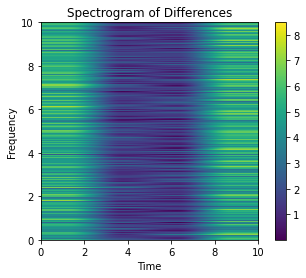

In [19]:
#plot using imshow instead of colormesh was blending values to try to create 3D when we just want 2D rep
plt.imshow(np.array(fftshift(absdiffscols)), extent=(0,10,0,10), resample=False)
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram of Differences')
plt.show()

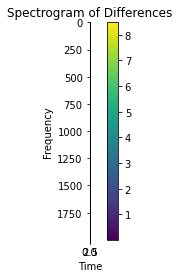

In [20]:
#convention for plotting matrices is using 'upper' - think this is what the default was but 2000>>4 so 
#can't see properly 
numcols=4
numrows=2000

plt.imshow(np.array(fftshift(absdiffscols)), extent=(-0.5, numcols-0.5, numrows-0.5, -0.5))
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram of Differences')
plt.show()

In [21]:
(-0.5, numcols-0.5, numrows-0.5, -0.5)

(-0.5, 3.5, 1999.5, -0.5)